# Multiple Linear Regression


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load Dataset

In [7]:
data=r"C:\Users\admin\Downloads\50_Startups.csv"

In [11]:
df=pd.read_csv(data)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 1. Exploratory Data Analysis


In [20]:
df.shape

(50, 5)

In [30]:
df.size

250

In [16]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
#Checking for null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [24]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [32]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [36]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

Data Analysis and visualization

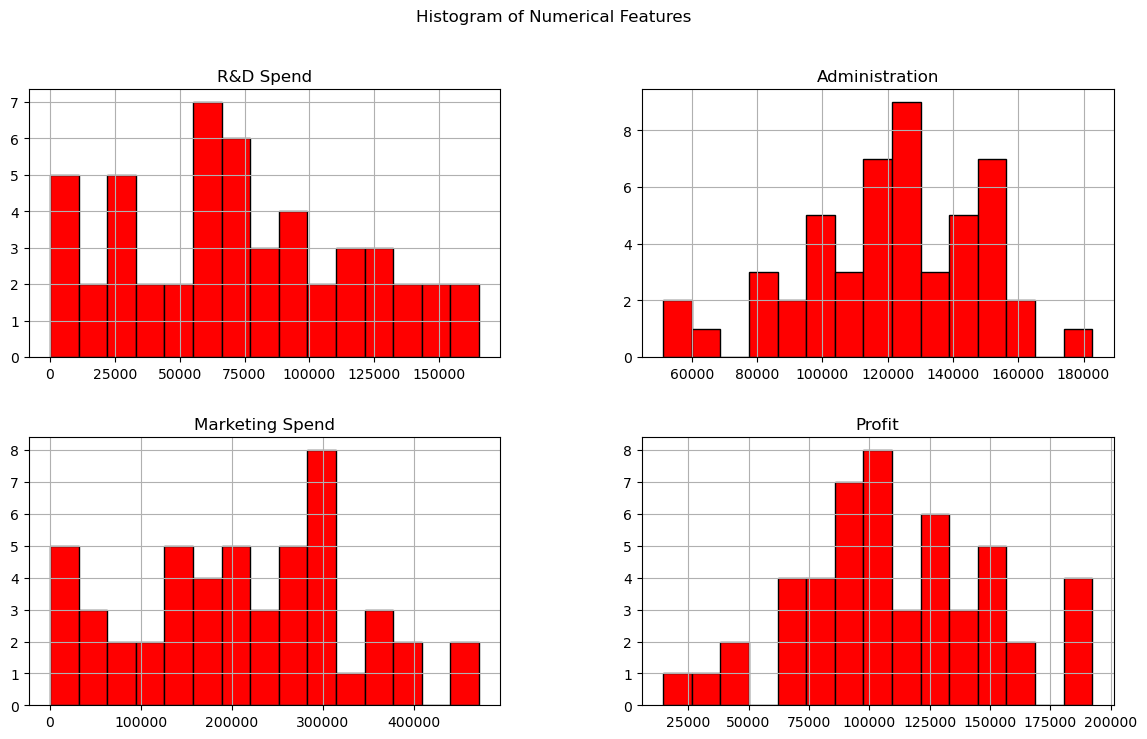

In [51]:
# Hist plot
df.hist(figsize=(14,8),bins=15,edgecolor='black',color='Red')
plt.suptitle("Histogram of Numerical Features")
plt.show()

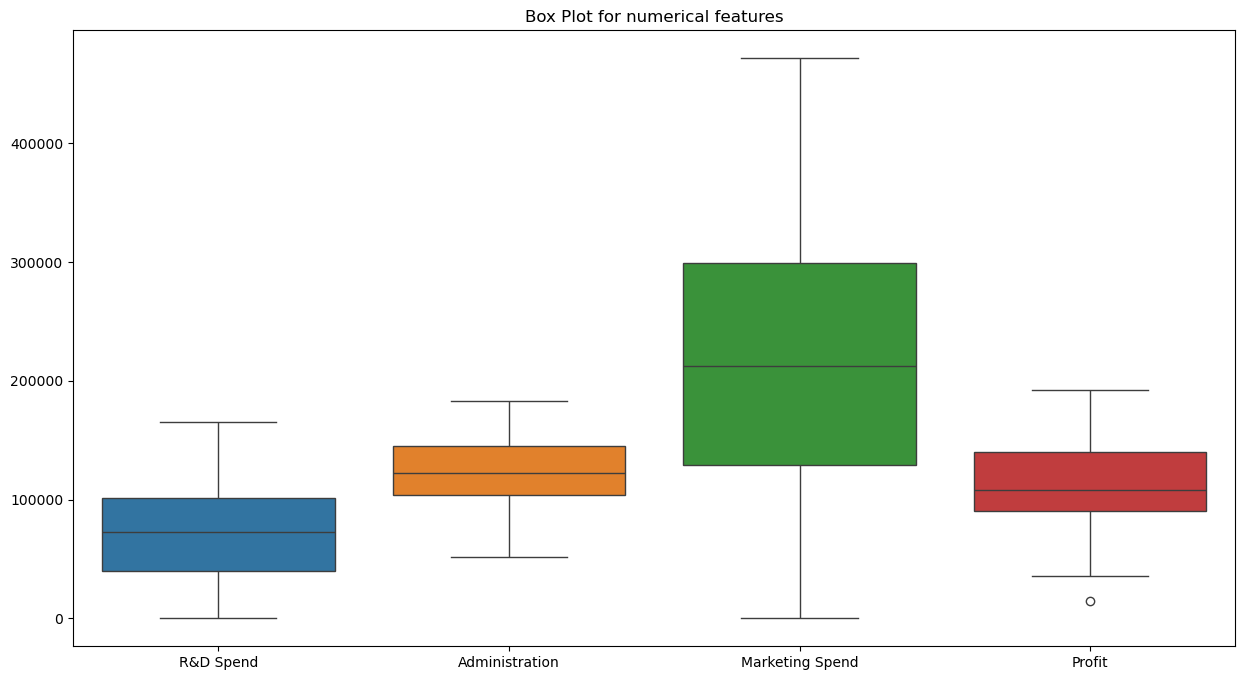

In [61]:
#box plot
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(columns=["State"]))
plt.title("Box Plot for numerical features")
plt.show()

            

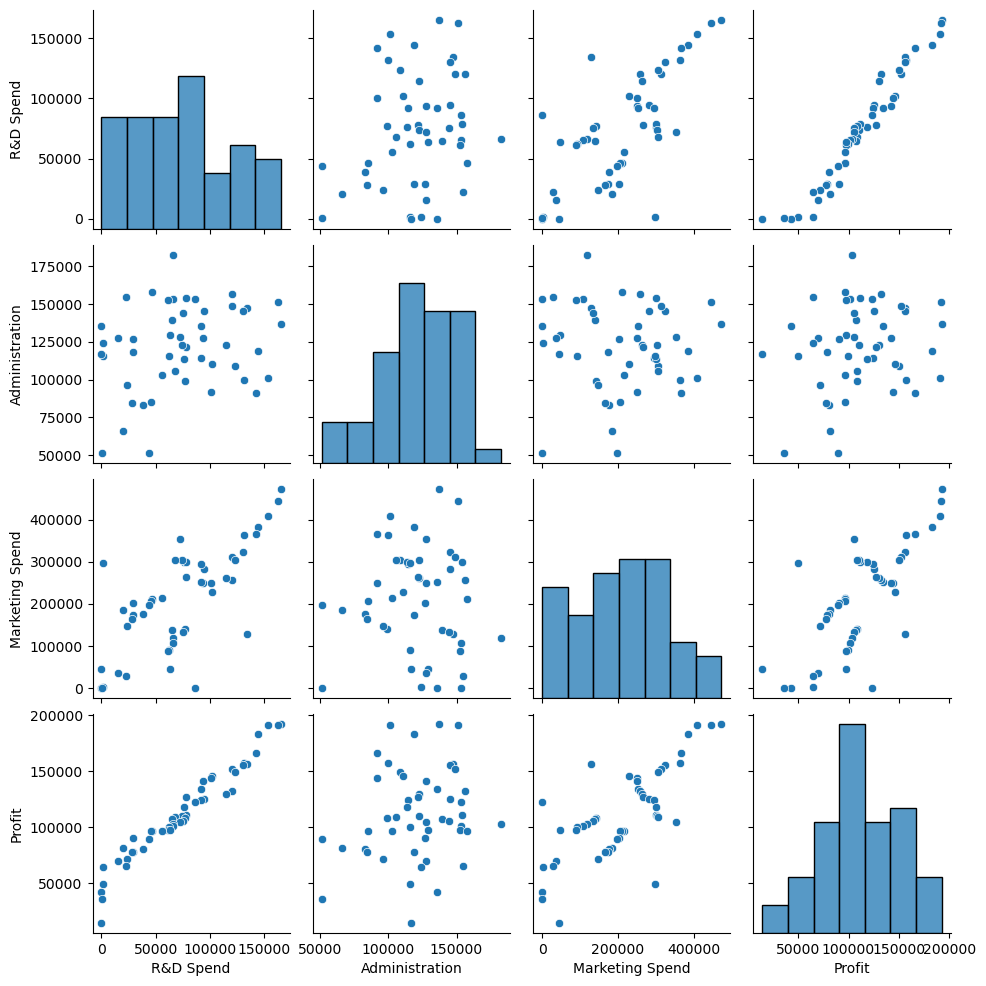

In [39]:
sns.pairplot(df)

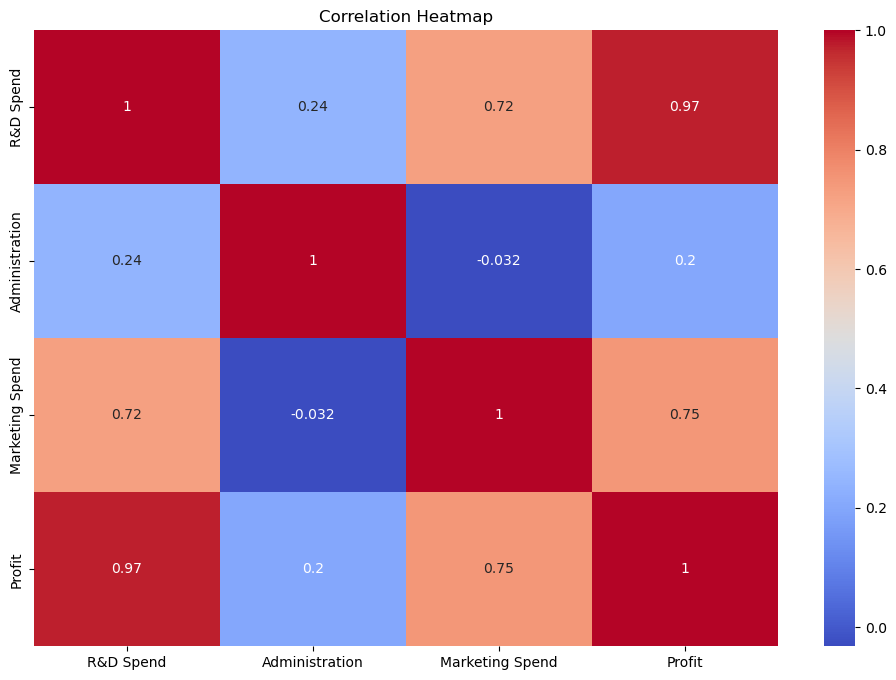

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [131]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
# Preprocessing
#Separate features and target
X=df.drop("Profit",axis=1)
y=df["Profit"]

In [191]:

# Convert to numeric just in case
X = X.apply(pd.to_numeric, errors="coerce")
y = pd.to_numeric(y, errors="coerce")

In [193]:
#One-hot encode categorical variable 'State'
X_encoded=pd.get_dummies(X,drop_first=True)
print("/n--- Encoded Features---")
print(X_encode.head())

/n--- Encoded Features---
   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0  165349.20       136897.80        471784.10          False            True
1  162597.70       151377.59        443898.53          False           False
2  153441.51       101145.55        407934.54           True           False
3  144372.41       118671.85        383199.62          False            True
4  142107.34        91391.77        366168.42           True           False


In [195]:
# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain/Test Shapes:", X_train.shape, X_test.shape)


Train/Test Shapes: (40, 5) (10, 5)


# Build Models

In [274]:
results = {}

 Model 1 Linear Regression

In [277]:
model1 = LinearRegression()
model1.fit(X_train,y_train)


LinearRegression()

In [279]:
y_pred1 = model1.predict(X_test)

In [281]:
print("\n---Model 1 Coefficients---")
coeff_df1=pd.DataFrame(model1.coef_, X.columns,columns=["Coefficient"])
print(coeff_df1)


---Model 1 Coefficients---
                 Coefficient
R&D Spend           0.805630
Administration     -0.068788
Marketing Spend     0.029855
State_Florida     938.793006
State_New York      6.987760


In [283]:
# Evaluation
print("/nModel 1 Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test,y_pred1))

/nModel 1 Evaluation:
R2 Score: 0.8987266414328637
MSE: 82010363.04430102


In [285]:
results["LinearRegression"] = {
    "MAE": mean_absolute_error(y_test, y_pred1),
    "MSE": mean_squared_error(y_test, y_pred1),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred1)),
    "R2": r2_score(y_test, y_pred1)
}

Model 2 : Ridge Regression

In [288]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)


StandardScaler()

In [290]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [292]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [294]:
results["Ridge"] = {
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "MSE": mean_squared_error(y_test, y_pred_ridge),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    "R2": r2_score(y_test, y_pred_ridge)
}

Model 3: Lasso Regression

In [298]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1, max_iter=10000)

In [300]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [302]:
results["Lasso"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "MSE": mean_squared_error(y_test, y_pred_lasso),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    "R2": r2_score(y_test, y_pred_lasso)
}


Model 4: RandomForest (non-linear baseline)

In [305]:
rf=RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [307]:
y_pred_rf=rf.predict(X_test)

In [314]:
results["RandomForest"]={
    "MAE": mean_absolute_error(y_test,y_pred_rf),
    "MSE":mean_squared_error(y_test, y_pred_rf),
    "RMSE":np.sqrt(mean_squared_error(y_test,y_pred_rf)),
    "R2": r2_score(y_test,y_pred_rf)}

#Comapare results

In [316]:
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                          MAE           MSE         RMSE        R2
LinearRegression  6961.477813  8.201036e+07  9055.957323  0.898727
Ridge             7412.284975  8.473180e+07  9204.987746  0.895366
Lasso             6961.418738  8.200849e+07  9055.853741  0.898729
RandomForest      6193.070650  7.649919e+07  8746.381725  0.905532




 *RandomForest performs the best → lowest MAE/MSE/RMSE and highest R² (0.9055).

*Linear Regression and Lasso are almost identical → both perform well (R² ≈ 0.899).

*Ridge performs slightly worse than Linear/Lasso here (R² = 0.895).

In [335]:
# Function to calculate Adjusted R²
# ---------------------------
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of samples and predictors
n = X_test.shape[0]
p = X_test.shape[1]

# Add Adjusted R² to results table
results_df["Adj_R2"] = results_df["R2"].apply(lambda r2: adjusted_r2(r2, n, p))

# Final Comparison Table
print("\n📊 Model Performance Comparison with Adjusted R²:\n")
print(results_df)


📊 Model Performance Comparison with Adjusted R²:

                          MAE           MSE         RMSE        R2    Adj_R2
LinearRegression  6961.477813  8.201036e+07  9055.957323  0.898727  0.772135
Ridge             7412.284975  8.473180e+07  9204.987746  0.895366  0.764573
Lasso             6961.418738  8.200849e+07  9055.853741  0.898729  0.772140
RandomForest      6193.070650  7.649919e+07  8746.381725  0.905532  0.787448


In [326]:
print(results_df.head())


                          MAE           MSE         RMSE        R2    Adj_R2
LinearRegression  6961.477813  8.201036e+07  9055.957323  0.898727  0.772135
Ridge             7412.284975  8.473180e+07  9204.987746  0.895366  0.764573
Lasso             6961.418738  8.200849e+07  9055.853741  0.898729  0.772140
RandomForest      6193.070650  7.649919e+07  8746.381725  0.905532  0.787448


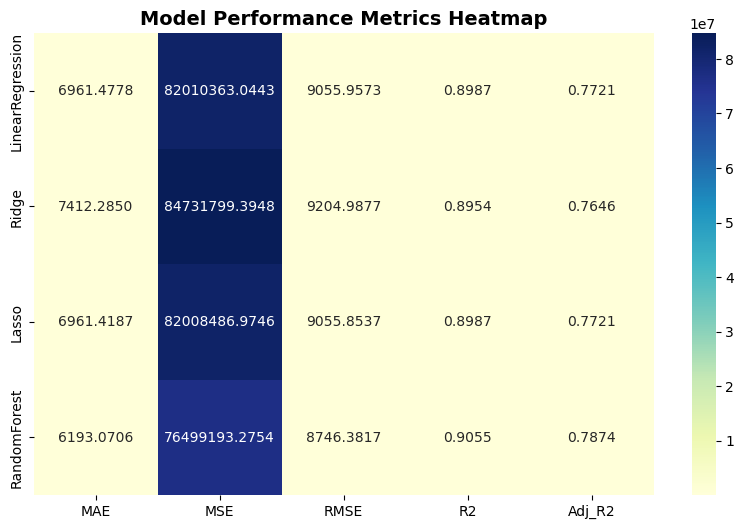

In [328]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df, 
    annot=True, fmt=".4f", cmap="YlGnBu", cbar=True
)
plt.title("Model Performance Metrics Heatmap", fontsize=14, weight='bold')
plt.show()


In [240]:
# Assumption Checks (OLS)
# ----------------------------
# Refit OLS on training data (for residual analysis)

In [248]:
# Refit OLS on training data (for residual analysis)
X_train_const = sm.add_constant(X_train.astype(float))
ols = sm.OLS(y_train.astype(float), X_train_const).fit()
print("\nOLS Summary:")
print(ols.summary())


OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     140.1
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.13e-21
Time:                        13:15:53   Log-Likelihood:                -420.63
No. Observations:                  40   AIC:                             853.3
Df Residuals:                      34   BIC:                             863.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.403e+04  

In [252]:
# Residuals
y_pred_train = ols.predict(X_train_const)
residuals = y_train - y_pred_train

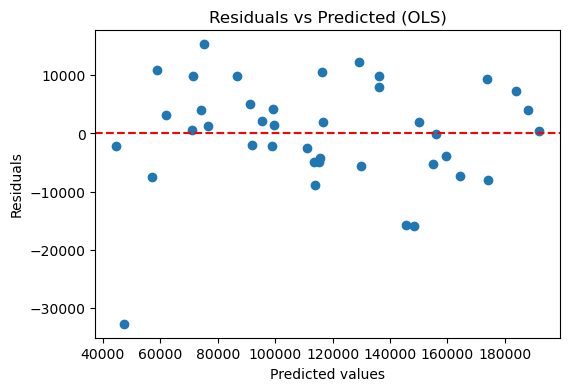

In [254]:
# Residual plot
plt.figure(figsize=(6,4))
plt.scatter(y_pred_train, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (OLS)")
plt.show()

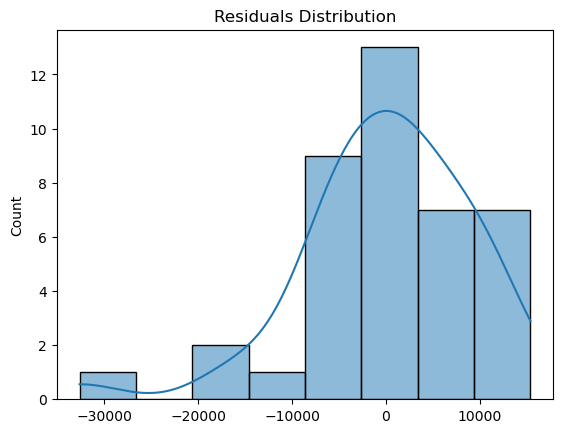

In [256]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

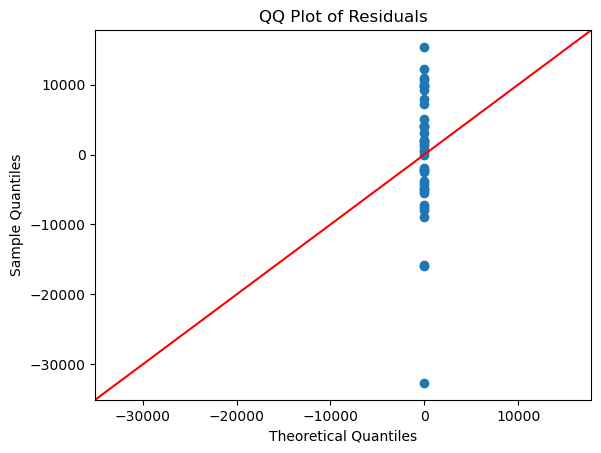

In [258]:
# QQ plot
sm.qqplot(residuals, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

In [260]:
# Shapiro-Wilk normality test
stat, pval = shapiro(residuals)
print(f"\nShapiro-Wilk test p-value: {pval:.4f}")



Shapiro-Wilk test p-value: 0.0112


In [250]:
# VIF
X_vif = sm.add_constant(X_train.astype(float))
vif = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_df = pd.DataFrame({"Feature": X_vif.columns, "VIF": vif})
print("\nVIF values:")
print(vif_df)


VIF values:
           Feature        VIF
0            const  30.512869
1        R&D Spend   2.617197
2   Administration   1.156512
3  Marketing Spend   2.698945
4    State_Florida   1.471243
5   State_New York   1.410878


In [262]:
# Breusch-Pagan test (heteroscedasticity)
bp_test = het_breuschpagan(residuals, X_train_const)
bp_labels = ["LM stat", "LM p-value", "F stat", "F p-value"]
print("\nBreusch-Pagan test results:")
print(dict(zip(bp_labels, bp_test)))



Breusch-Pagan test results:
{'LM stat': 2.489543506622258, 'LM p-value': 0.7780690099377544, 'F stat': 0.45131137894896245, 'F p-value': 0.809328754605436}


In [337]:
#Final Notes
# ----------------------------
print("\n--- Assumptions & Implications ---")
print("1. If VIF > 10, multicollinearity exists → coefficients unstable.")
print("2. If Shapiro test p < 0.05 → residuals not normal.")
print("3. If Breusch-Pagan p < 0.05 → heteroscedasticity present.")
print("4. Ridge & Lasso reduce multicollinearity impact, RandomForest handles non-linearity.")


--- Assumptions & Implications ---
1. If VIF > 10, multicollinearity exists → coefficients unstable.
2. If Shapiro test p < 0.05 → residuals not normal.
3. If Breusch-Pagan p < 0.05 → heteroscedasticity present.
4. Ridge & Lasso reduce multicollinearity impact, RandomForest handles non-linearity.
